## 1. Import libraries and datasets

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('Churn_Modelling.csv')
# CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

## 2. Encode Categorical data

Label Encode the "Gender" column and One Hot Encode the "Geography" column

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Gender encode
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

# Geography column encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# Geography (3), CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
x = np.array(ct.fit_transform(x))

## 3. Preparing the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4a. Train using Logistic Regression

This is akin to a single "Neuron".

Credits: [@kanncaa1](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" width="400" height="auto"/>

(Source: [Sebastian Raschka, n.d.](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html))

In [36]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def euclidean_normalize(z, axis=0):
    return np.apply_along_axis(lambda a: np.sqrt(np.sum(np.power(a, 2))), axis, z)

def unit_step(y_values_pred):
    pred_avg = (np.min(y_values_pred) + np.max(y_values_pred)) / 2
    return y_values_pred.flatten() > pred_avg, pred_avg

class LogisticRegression:
    
    def __init__(self, x_dimension):
        self.weights = np.full((x_dimension), 1/(10**3))
        self.bias = 0.0
        
    def activation_function(self, x_values):
        return sigmoid(np.dot(x_values, self.weights.T) + self.bias)

    def forward_propagation(self, x_values, y_values):
        # Use sigmoid activation function: Probabilistic value from 0-1
        y_computed = self.activation_function(x_values)
        # Use binary cross-entropy loss
        cost = np.sum(-y_values * np.log(y_computed) - (1 - y_values) * np.log(1 - y_computed)) / x_values.shape[0]     
        return y_computed, cost

    def backward_propagation(self, x_values, y_values, y_computed):
        y_derivative = y_computed - y_values
        # Apply linear combination (partial without sum) for each gradient * x input value
        x_values_gradient = np.array([x_values[i] * y_derivative[i] for i in range(x_values.shape[0])])
        # Sum all x input values which eventually divides by total rows
        x_values_hlc = np.array([np.sum(x_values_gradient[:,i]) for i in range(x_values_gradient.shape[1])]) / x_values.shape[0]

        # Derivative value of loss function with respect to weight
        weight_derivative = x_values_hlc / x_values.shape[1]

        # Derivative value of loss function with respect 
        bias_derivative = np.sum(y_derivative) / x_values.shape[1]
        return (weight_derivative, bias_derivative)

    def update_parameters(self, x_values, y_values, learning_rate=0.01, no_of_iterations=150):
        costs = []

        for i in range(no_of_iterations):
            y_computed, cost = self.forward_propagation(x_values, y_values)
            gradients = self.backward_propagation(x_values, y_values, y_computed)

            # Update weights and biases using batch gradient descent
            self.weights = self.weights - learning_rate * gradients[0]
            self.bias = self.bias - learning_rate * gradients[1]

            print(f'Cost for iteration {i + 1}: {cost}')
            costs.append(cost)

        return gradients, costs

    def predict(self, x_values):
        return np.array([self.activation_function([v]) for v in x_values])

model = LogisticRegression(x_train.shape[1])
_, costs = model.update_parameters(x_train, y_train, no_of_iterations=250)


Cost for iteration 1: 0.6931267316890196
Cost for iteration 2: 0.5326591089930504
Cost for iteration 3: 0.5061714423292546
Cost for iteration 4: 0.5058058586589186
Cost for iteration 5: 0.505780403921694
Cost for iteration 6: 0.5057562592485311
Cost for iteration 7: 0.5057321323585164
Cost for iteration 8: 0.5057080141640107
Cost for iteration 9: 0.5056839046002294
Cost for iteration 10: 0.5056598036636925
Cost for iteration 11: 0.5056357113513411
Cost for iteration 12: 0.5056116276601199
Cost for iteration 13: 0.5055875525869744
Cost for iteration 14: 0.5055634861288505
Cost for iteration 15: 0.5055394282826952
Cost for iteration 16: 0.5055153790454561
Cost for iteration 17: 0.5054913384140812
Cost for iteration 18: 0.5054673063855198
Cost for iteration 19: 0.5054432829567217
Cost for iteration 20: 0.505419268124637
Cost for iteration 21: 0.5053952618862173
Cost for iteration 22: 0.5053712642384143
Cost for iteration 23: 0.5053472751781807
Cost for iteration 24: 0.5053232947024697
Cos

Cost for iteration 198: 0.5012786991205173
Cost for iteration 199: 0.5012561746884517
Cost for iteration 200: 0.5012336583162401
Cost for iteration 201: 0.5012111500009679
Cost for iteration 202: 0.5011886497397213
Cost for iteration 203: 0.5011661575295875
Cost for iteration 204: 0.5011436733676543
Cost for iteration 205: 0.5011211972510101
Cost for iteration 206: 0.5010987291767445
Cost for iteration 207: 0.5010762691419474
Cost for iteration 208: 0.5010538171437098
Cost for iteration 209: 0.5010313731791233
Cost for iteration 210: 0.5010089372452803
Cost for iteration 211: 0.5009865093392741
Cost for iteration 212: 0.5009640894581985
Cost for iteration 213: 0.5009416775991481
Cost for iteration 214: 0.5009192737592186
Cost for iteration 215: 0.5008968779355063
Cost for iteration 216: 0.5008744901251079
Cost for iteration 217: 0.5008521103251213
Cost for iteration 218: 0.5008297385326451
Cost for iteration 219: 0.5008073747447784
Cost for iteration 220: 0.5007850189586216
Cost for it

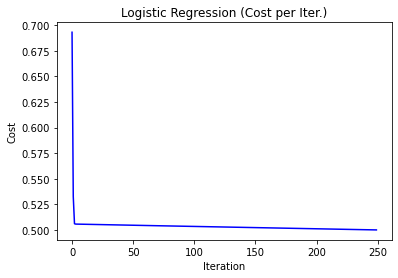

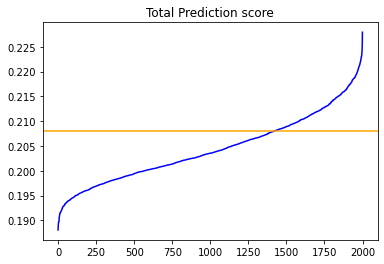

Divider: 0.20800415789577803 (Min: 0.18809916280359776, Max: 0.22790915298795827)



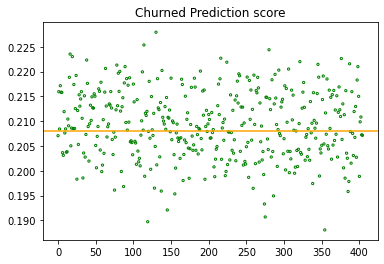

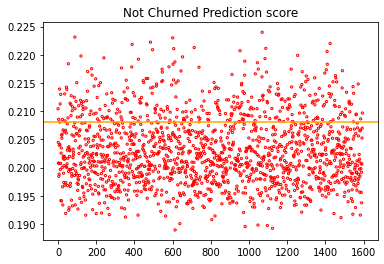

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


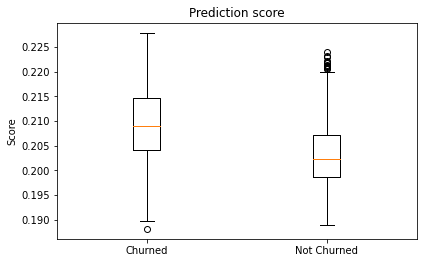


                    Churned  Not Churned
Outlier (min)     0.000000     0.220603
Outlier (max)     0.000000     0.224000
Outlier (avg)     0.000000     0.221833
Min               0.189746     0.188965
Max               0.227909     0.219899
Q1 (25%)          0.204191     0.198644
Q2 (50%, median)  0.208921     0.202370
Q3 (75%)          0.214719     0.207171 

             Pred. Not Churned  Pred. Churned  Accuracy Score  Total
Not Churned               1242            353        0.778683   1595
Churned                    180            225        0.555556    405 

Accuracy score: 0.7335 (Correct: 1467, Incorrect: 533)



In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(np.arange(len(costs)), costs, color='blue')
plt.title('Logistic Regression (Cost per Iter.)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

y_pred_prob = model.predict(x_test)
y_pred, y_pred_divider = unit_step(y_pred_prob)

y_test_1 = list(map(lambda a: a[1], filter(lambda a: y_test[a[0]] == 1, enumerate(y_pred_prob))))
y_test_0 = list(map(lambda a: a[1], filter(lambda a: y_test[a[0]] == 0, enumerate(y_pred_prob))))

plt.plot(np.arange(len(y_pred_prob)), sorted(y_pred_prob), color='blue')
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Total Prediction score')
plt.show()

print(f'Divider: {y_pred_divider} (Min: {np.min(y_pred_prob)}, Max: {np.max(y_pred_prob)})\n')

plt.scatter(np.arange(len(y_test_1)), y_test_1, facecolors='none', edgecolors='green', s=5)
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Churned Prediction score')
plt.show()

plt.scatter(np.arange(len(y_test_0)), y_test_0, facecolors='none', edgecolors='red', s=5)
plt.axhline(y=y_pred_divider, color='orange', linestyle='-')
plt.title('Not Churned Prediction score')
plt.show()

fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel('Score')
ax.set_title('Prediction score')
ax.set_xticklabels(('Churned', 'Not Churned'))
bp = ax.boxplot([
    [p[0] for i, p in enumerate(y_pred_prob) if y_test[i] == 1],
    [p[0] for i, p in enumerate(y_pred_prob) if y_test[i] == 0], 
])
plt.show()

outliers = [flier.get_ydata() for flier in bp['fliers']]
medians = [median.get_ydata() for median in bp['medians']]
whiskers = [whiskers.get_ydata() for whiskers in bp['whiskers']]

print('\n', pd.DataFrame([
    list(map(lambda i: np.min(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    list(map(lambda i: np.max(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    list(map(lambda i: np.average(outliers[i]) if np.sum(outliers[i]) > 1 else 0, [0,1])),
    [whiskers[0][1], whiskers[2][1]],
    [whiskers[1][1], whiskers[3][1]],
    [whiskers[0][0], whiskers[2][0]],
    [medians[0][0], medians[1][0]],
    [whiskers[1][0], whiskers[3][0]]
], columns=['Churned', 'Not Churned'], index=['Outlier (min)', 'Outlier (max)', 'Outlier (avg)', 'Min', 'Max', 'Q1 (25%)', 'Q2 (50%, median)', 'Q3 (75%)']), '\n')

cm = confusion_matrix(y_test, y_pred)

nc_total = len(list(filter(lambda a: a == 0, y_test)))
c_total = len(list(filter(lambda a: a == 1, y_test)))

print(pd.DataFrame([
    list(cm[0]) + [cm[0][0] / nc_total, nc_total],
    list(cm[1]) + [cm[1][1] / c_total, c_total],
    
], columns=['Pred. Not Churned', 'Pred. Churned', 'Accuracy Score', 'Total'], index=['Not Churned', 'Churned']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} (Correct: {cm[0][0] + cm[1][1]}, Incorrect: {cm[0][1] + cm[1][0]})\n')


## 4b. Train the 2-layer ANN model

With a rough idea like this,

<img src="http://media5.datahacker.rs/2018/08/tanh_sigma_activations.png" width="350" height="auto" />

(Source: [datahacker.rs, 2018](http://datahacker.rs/activation-functions-and-derivatives/))

In [43]:
from random import random

class ANN2Layer:
    
    def __init__(self, x_dimension, y_dimension, no_of_neurons=6):
        self.weights_L1 = np.random.uniform(low=0, high=1/(10**3), size=(no_of_neurons, x_dimension))
        self.weights_L2 = np.random.uniform(low=0, high=1/(10**3), size=(y_dimension, no_of_neurons))
        self.bias_L1 = np.zeros((no_of_neurons, 1))
        self.bias_L2 = np.zeros((y_dimension, 1))

    def activation_function_L1(self, x_values):
        return np.tanh(np.dot(self.weights_L1, x_values.T) + self.bias_L1)
    
    def activation_function_L2(self, A1):
        return sigmoid(np.dot(self.weights_L2, A1) + self.bias_L2)

    def forward_propagation(self, x_values):
        A1 = self.activation_function_L1(x_values)
        A2 = self.activation_function_L2(A1)
        return A1, A2

    def backward_propagation(self, x_values, y_values, A1, A2):
        A2_derivative = A2 - y_values

        weights_L2_derivative = np.array([np.dot(A2_derivative, v.T) / x_values.shape[1] for v in A1]).T        
        bias_L2_derivative = np.sum(A2_derivative, axis=1, keepdims=True) / x_values.shape[1]
        
        A1_derivative = np.dot(self.weights_L2.T, A2_derivative) * (1 - np.power(A1, 2))

        # Apply gradients to each x in each neuron
        x_values_gradients = np.array([[x_values[j] * A1_derivative[i][j] for j in range(x_values.shape[0])] for i in range(A1_derivative.shape[0])])
        # Apply sum divided by no of x rows
        x_values_hlc = np.array([[np.sum(x_values_gradients[i][:,j]) / x_values.shape[0] for j in range(x_values.shape[1])] for i in range(A1_derivative.shape[0])])

        weights_L1_derivative = x_values_hlc / x_values.shape[1]
        bias_L1_derivative = np.sum(A1_derivative, axis=1, keepdims=True) / x_values.shape[1]

        return (weights_L1_derivative, bias_L1_derivative), (weights_L2_derivative, bias_L2_derivative)

    def update_parameters(self, x_values, y_values, learning_rate=0.01, no_of_iterations=150):
        costs = []
        
        for i in range(no_of_iterations):
            A1, A2 = self.forward_propagation(x_values)
            cost = -np.sum(np.multiply(np.log(A2), y_values)) / y_values.shape[0]
            A1_gradients, A2_gradients = self.backward_propagation(x_values, y_values, A1, A2)

            # Update weights and biases using batch gradient descent
            self.weights_L1 = self.weights_L1 - learning_rate * A1_gradients[0]
            self.bias_L1 = self.bias_L1 - learning_rate * A1_gradients[1]

            self.weights_L2 = self.weights_L2 - learning_rate * A2_gradients[0]
            self.bias_L2 = self.bias_L2 - learning_rate * A2_gradients[1]

            print(f'Cost for iteration {i + 1}: {cost}')
            costs.append(cost)
            
        return A1_gradients, A2_gradients, costs
    
    def predict(self, x_values):
        return np.array([np.sum(self.forward_propagation(np.array([v]))[1]) / self.weights_L2.shape[0] for v in x_values])


model = ANN2Layer(x_train.shape[1], 1)
_, _, costs = model.update_parameters(x_train, y_train, no_of_iterations=250)


Cost for iteration 1: 0.14140200847716708
Cost for iteration 2: 0.429109857700764
Cost for iteration 3: 0.33497421857032134
Cost for iteration 4: 0.32363103539283544
Cost for iteration 5: 0.32434009916521267
Cost for iteration 6: 0.32428058895588924
Cost for iteration 7: 0.32428539814116886
Cost for iteration 8: 0.32428490167660606
Cost for iteration 9: 0.3242848430094622
Cost for iteration 10: 0.3242847477071041
Cost for iteration 11: 0.32428465489077896
Cost for iteration 12: 0.32428456126407307
Cost for iteration 13: 0.32428446703422514
Cost for iteration 14: 0.32428437211859285
Cost for iteration 15: 0.3242842764580381
Cost for iteration 16: 0.3242841799909878
Cost for iteration 17: 0.32428408265553516
Cost for iteration 18: 0.3242839843892227
Cost for iteration 19: 0.3242838851290172
Cost for iteration 20: 0.32428378481126763
Cost for iteration 21: 0.32428368337166497
Cost for iteration 22: 0.3242835807452002
Cost for iteration 23: 0.3242834768661233
Cost for iteration 24: 0.32428

Cost for iteration 193: 0.3240594636100905
Cost for iteration 194: 0.32405370686523177
Cost for iteration 195: 0.3240478041098993
Cost for iteration 196: 0.3240417516664141
Cost for iteration 197: 0.32403554576581645
Cost for iteration 198: 0.3240291825456655
Cost for iteration 199: 0.3240226580477906
Cost for iteration 200: 0.3240159682159914
Cost for iteration 201: 0.3240091088936865
Cost for iteration 202: 0.32400207582150975
Cost for iteration 203: 0.3239948646348538
Cost for iteration 204: 0.3239874708613576
Cost for iteration 205: 0.323979889918341
Cost for iteration 206: 0.32397211711018054
Cost for iteration 207: 0.3239641476256304
Cost for iteration 208: 0.3239559765350831
Cost for iteration 209: 0.3239475987877722
Cost for iteration 210: 0.32393900920891455
Cost for iteration 211: 0.3239302024967917
Cost for iteration 212: 0.3239211732197683
Cost for iteration 213: 0.3239119158132489
Cost for iteration 214: 0.3239024245765695
Cost for iteration 215: 0.323892693669825
Cost for

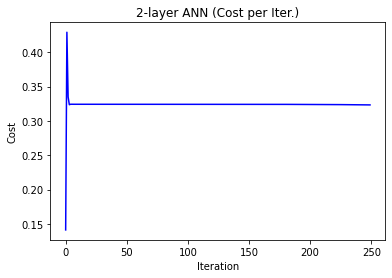

Divider: 0.2046398422087355 (Min: 0.20055057624660588, Max: 0.20872910817086507)

             Pred. Not Churned  Pred. Churned  Accuracy Score  Total
Not Churned               1194            401        0.748589   1595
Churned                    153            252        0.622222    405 

Accuracy score: 0.723 (Correct: 1446, Incorrect: 554)



In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(np.arange(len(costs)), costs, color='blue')
plt.title('2-layer ANN (Cost per Iter.)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

y_pred_prob = model.predict(x_test)
y_pred, y_pred_divider = unit_step(y_pred_prob)

print(f'Divider: {y_pred_divider} (Min: {y_pred_prob.min()}, Max: {y_pred_prob.max()})\n')

cm = confusion_matrix(y_test, y_pred)

nc_total = len(list(filter(lambda a: a == 0, y_test)))
c_total = len(list(filter(lambda a: a == 1, y_test)))

print(pd.DataFrame([
    list(cm[0]) + [cm[0][0] / nc_total, nc_total],
    list(cm[1]) + [cm[1][1] / c_total, c_total],
    
], columns=['Pred. Not Churned', 'Pred. Churned', 'Accuracy Score', 'Total'], index=['Not Churned', 'Churned']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)} (Correct: {cm[0][0] + cm[1][1]}, Incorrect: {cm[0][1] + cm[1][0]})\n')